# Introduction

In this project we are going to model the Bike Sharing Dataset from the Capital Bikeshare System using regression modeling and learn how variables such as temperature, wind, and time affect bicycle rentals in the mid-Atlantic region of the United States

Here we will be building a simple way of interacting with environment factors such as temperature, wind, time and weather and anylyse how they efect the bike rentals

# Exploring bike sharing dataset

Bike sharing is a very demaded and popular but still a new and experimental process.Using a mobile phone, a rider can sign up online from a phone application, locate bicycles, and rent one. 
Their are many application in appstore and play store like Wheelstreet, WICKEDRIDE, Zoomcar for pedel and many more.

This model creates an entire ecosystem where nobody needs to talk or meet in person to start enjoying this service

According to Hadi Fanaee-T of the Laboratory of Artificial Intelligence and Decision Support,
Opposed to other transport services such as bus or train, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of the important events in the city could be detected via monitoring these data.

Contains two datasets: “hour.csv” and “day.csv”. 

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
#import required library

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#read the dataset (both day and hours)

In [6]:
day_df=pd.read_csv('/home/shubham/Machine Learning/FireBlaze/24 Project/Bike Rent/28865_36778_bundle_archive/day.csv')

In [7]:
hour_df=pd.read_csv('/home/shubham/Machine Learning/FireBlaze/24 Project/Bike Rent/28865_36778_bundle_archive/hour.csv')

In [8]:
day_df.head()
#here first five row output of day dataset. 

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
hour_df.head()
#here first five row output of hour dataset. 

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# info of day dataset. 
We concluded that there is no any missing value. Total number of example in 731.
some of int or object and float. There are 16 features

In [10]:
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


# info of hour dataset. 
We concluded that there is no any missing value. Total number of example in 17379.
some of int or object and float. There are 17 features

In [11]:
hour_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
#drop instant column (because it like ID number)
day_df.drop('instant',axis=1,inplace=True)


Here following graph draw using matplotlib.
Shows the comparison between year and day wise. How many riders book the cycle from app.
These both of bar plot indicate the years, like wise 1 as 2012 year and 0 means 2011 year.
year (0: 2011, 1:2012)

Concluded that in 2012 mostly booked.

/home/shubham/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


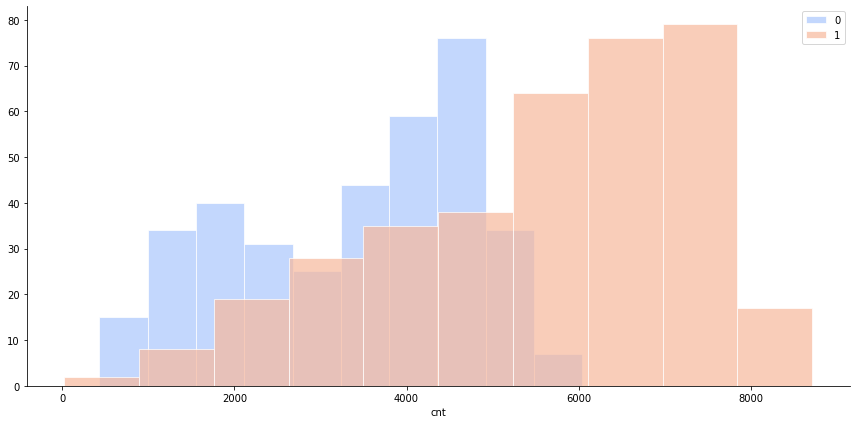

In [13]:
g=sns.FacetGrid(day_df, hue='yr', palette='coolwarm',size=6,aspect=2)
g=g.map(plt.hist,'cnt',alpha=0.7, edgecolor='w')
plt.legend()

These Bar Plot shows,
Number of bikes rented per season depend on season wise. 
Now compare the year wise and on casual basis.
In the given dataset there are 4 season
season (1:springer, 2:summer, 3:fall, 4:winter).

The give bar plot concluded that moslty summer and fall season bikes rented. Ans in 2012 highest number of rented users in summer and fall season.

Text(0.5, 1.0, 'Number of bikes rented per season')

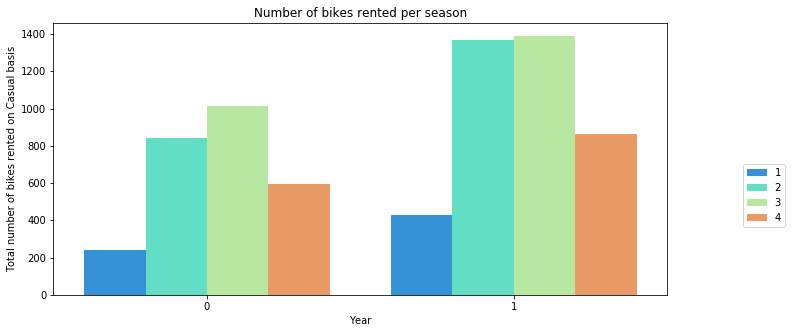

In [12]:
plt.figure(figsize=(11,5))
sns.barplot('yr','casual',hue='season', data=day_df,palette='rainbow', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented on Casual basis')
plt.title('Number of bikes rented per season')

following bar plot shows which in 2012 summer and fall season mostly bikes registered for rent.
This grpah compare year vs number of bikes rented on registered basis.
So,in 2012 in summer and fall seasons mostly registered.

Text(0.5, 1.0, 'Number of bikes rented per season')

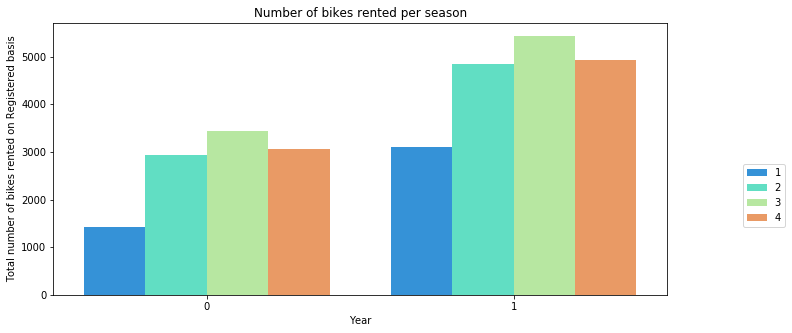

In [13]:
plt.figure(figsize=(11,5))
sns.barplot('yr','registered',hue='season', data=day_df,palette='rainbow', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented on Registered basis')
plt.title('Number of bikes rented per season')

Text(0.5, 1.0, 'Number of bikes rented per season')

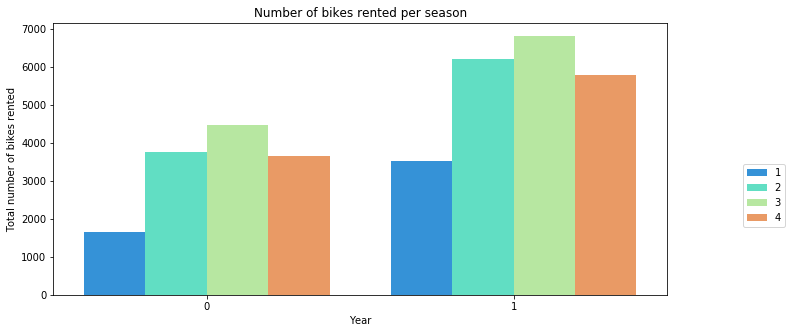

In [14]:
plt.figure(figsize=(11,5))
sns.barplot('yr','cnt',hue='season', data=day_df,palette='rainbow', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented')
plt.title('Number of bikes rented per season')

* There was a substantial increase in bike renting from year 2011 to year 2012.
* However, the trend for number of bikes rented based on seasons is the same each year.
* Bikes are least rented in Spring and the most during Fall.
* After Spring, there is a sudden increase in bike renting during summer.

In [15]:
df_season_fall=day_df[day_df['season']==3]

In [16]:
df_season_fall.mnth.nunique()

4

Fall happens to be 4 months long. Let's examine which month has the highest number of rents and why.

/home/shubham/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


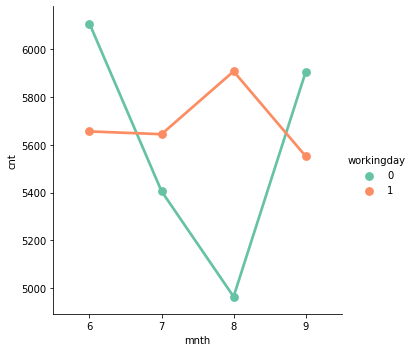

In [17]:
sns.factorplot('mnth','cnt',hue='workingday',data=df_season_fall, ci=None, palette='Set2')

* The renting is the maximum during the month 6(i.e. June: beginning of Fall) and also high during the month 9(i.e. September: end of Fall), considering a holiday/weekday
* Also, when the renting for holidays is the least in the month 8(i.e. August) there is also a increase in bikes rented on a work day.

Let's examine how the weather is responsible.

/home/shubham/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


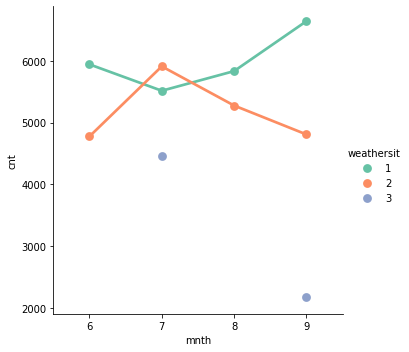

In [18]:
sns.factorplot('mnth','cnt',hue='weathersit',data=df_season_fall, ci=None, palette='Set2')

* There is a much clear weather by the end of Fall and the cloudy, misty weather finds its way back. That very well explains the previous insight on our data, that people enjoy renting and riding bikes on a holiday when the weather is clear.

Joint Plot: tem vs cnt.
cnt: count of total rental bikes including both casual and registered
tem: in celcius

Now, visualize the how many user active on temperature for rental bikes.
This joinplot shows that temperature in between 0.6 to 0.8 celcius mostly registered book.


/home/shubham/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


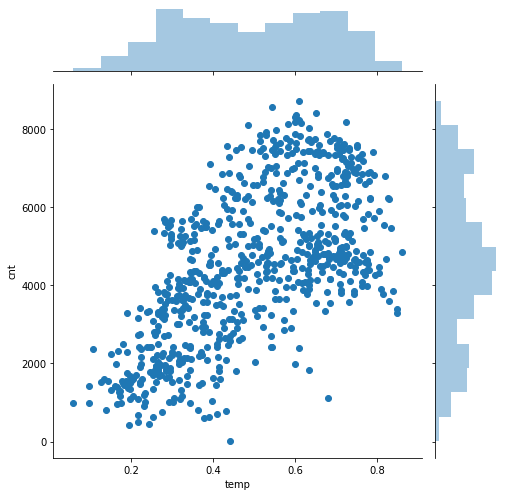

In [19]:
sns.jointplot('temp','cnt',data=day_df,size=7)

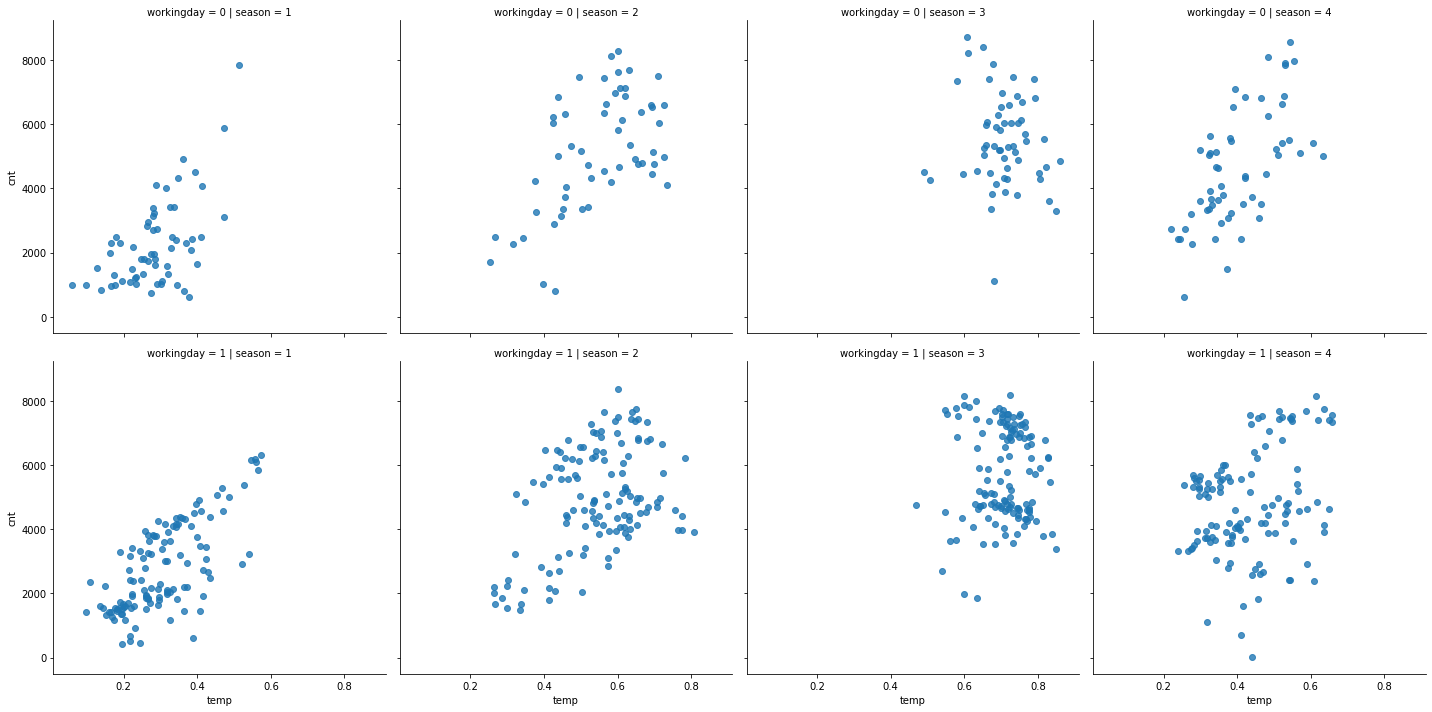

In [20]:
sns.lmplot('temp','cnt',row='workingday',col='season',data=day_df,palette='RdBu_r',fit_reg=False)

So, people prefer more and more cycling as the days get hotter.

In [21]:
hour_df.drop('instant',axis=1,inplace=True)

# Correlation Map

With help of these grpah we conclude that which feature are more correlated to each other. 
So it is helfull for feature selection. 
These corrleation map for hour dataset.
Generally accpet the Positive highly correlated features.
Now, see registered and cnt features are highly correlated(0.97) to each other.

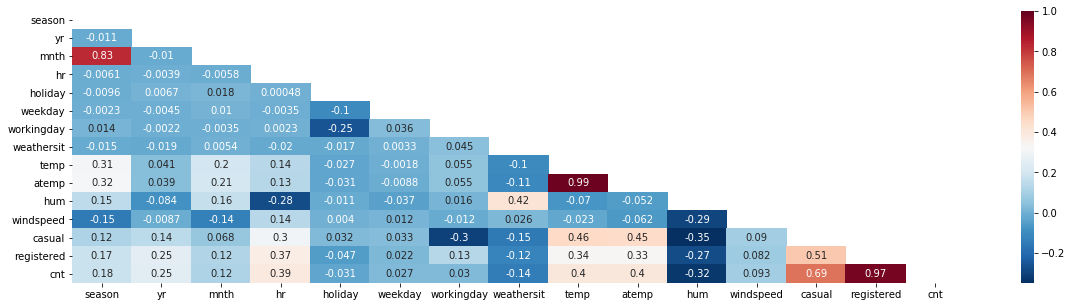

In [22]:
plt.figure(figsize=(20,5))
mask = np.zeros_like(hour_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(hour_df.corr(),cmap='RdBu_r',mask=mask, annot=True)

With help of these grpah we conclude that which feature are more correlated to each other. 
So it is helfull for feature selection. 
These corrleation map for day dataset.
Generally accpet the Positive highly correlated features.
Now, see temp and atemp features are highly correlated(0.99) to each other.

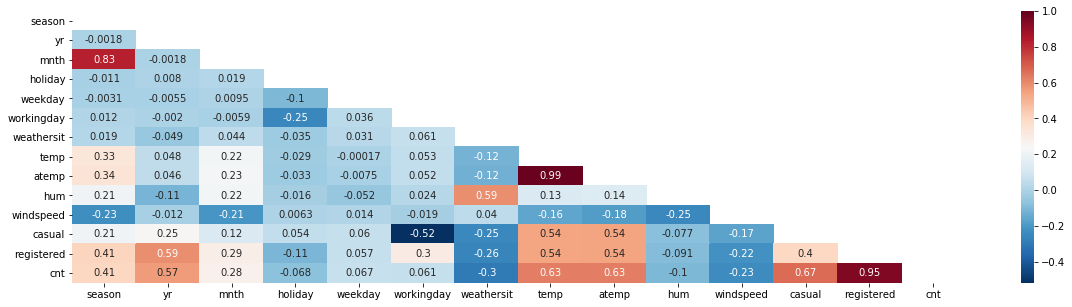

In [23]:
plt.figure(figsize=(20,5))
mask = np.zeros_like(day_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(day_df.corr(),cmap='RdBu_r',mask=mask, annot=True)

In [24]:
df=pd.merge(day_df,hour_df,how='left',left_on='dteday',right_on='dteday')

In [25]:
df.head()

,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,atemp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


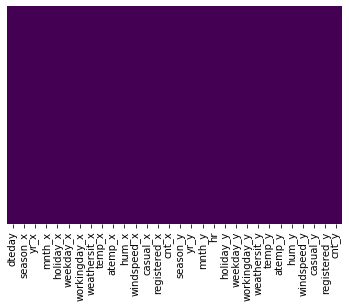

In [26]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

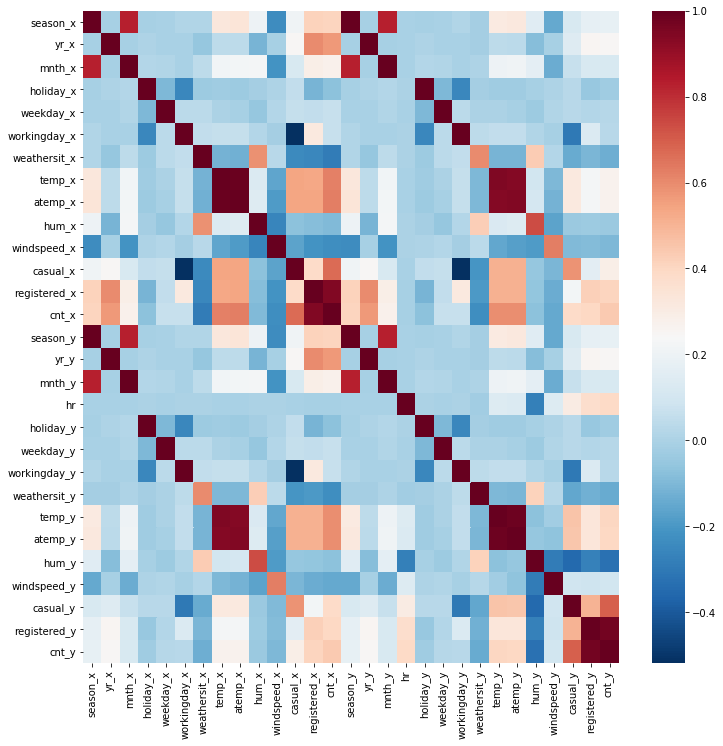

In [27]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),cmap='RdBu_r')

In [28]:
X=df.drop(['dteday','cnt_y'],axis=1)
y=df['cnt_y']

In [29]:
df.columns

Index(['dteday', 'season_x', 'yr_x', 'mnth_x', 'holiday_x', 'weekday_x',
       'workingday_x', 'weathersit_x', 'temp_x', 'atemp_x', 'hum_x',
       'windspeed_x', 'casual_x', 'registered_x', 'cnt_x', 'season_y', 'yr_y',
       'mnth_y', 'hr', 'holiday_y', 'weekday_y', 'workingday_y',
       'weathersit_y', 'temp_y', 'atemp_y', 'hum_y', 'windspeed_y', 'casual_y',
       'registered_y', 'cnt_y'],
      dtype='object')

**Now, let's predict the trend of renting on hourly basis**

In [30]:
#split the tarin and test dataset using sklearn
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test= train_test_split(X,y)

In [32]:
#used the regression model 
from sklearn.linear_model import LinearRegression

In [33]:
lm=LinearRegression()

In [34]:
#fit the dataset for predcition
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
#predict on test dataset
predictions=lm.predict(X_test)

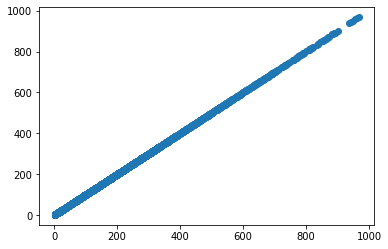

In [36]:
plt.scatter(y_test,predictions)

above graph shows that linear between test and prediction.
it means perfect prediction and no more outliers.

In [37]:
#calculate the regression perfromance measure
from sklearn import metrics

In [38]:
print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
print('MSE= ', metrics.mean_squared_error(y_test,predictions))
print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE=  1.0905599655653863e-12
MSE=  2.173115324940764e-24
RMS=  1.474149017209849e-12


In [39]:
pd.DataFrame(data=lm.coef_, index=X.columns, columns=['Coefficient'])

,Coefficient
season_x,3.238250e-14
yr_x,2.477681e-14
mnth_x,-1.169450e-15
holiday_x,-2.500619e-14
weekday_x,-6.579700e-15
workingday_x,7.896682e-15
weathersit_x,6.270321e-15
temp_x,-2.098000e-13
atemp_x,4.130940e-13
hum_x,1.434442e-13


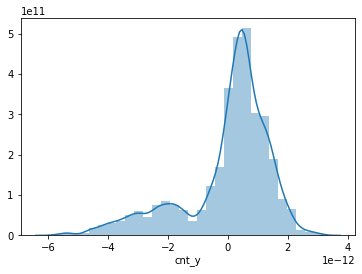

In [40]:
sns.distplot(y_test-predictions,bins=30)